# Exploratory Data Analysis (EDA) for Credit Card Fraud Detection

In this notebook, we will conduct a comprehensive exploratory data analysis (EDA) on the credit card fraud detection dataset. The goal is to gain insights into the data, understand the relationships between variables, and prepare the data for modeling.

We will:
- Explore the distribution of the target variable.
- Analyze numerical and categorical features.
- Identify potential feature engineering opportunities.
- Log all significant findings and visualizations to Weights & Biases (WandB) for tracking and reproducibility.


## 1. Import Necessary Libraries and Initialize WandB

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wandb

/opt/anaconda3/lib/python3.13/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the

In [2]:
# Initialize WandB for tracking
# NOTE: Create one project for testing and another one for final submission/execution
#       In the testing one you will execute one-by-one and have many runs, and after we finish everyhitng,
#       you will run all components as a pipeline.
wandb.init(project="credit-card-fraud-detection-1", job_type="EDA")

wandb: Currently logged in as: dvalia (dvalia-self-employed) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
# Load the cleaned dataset from the previous component
data = pd.read_csv("data/balanced_dataset.csv")

In [5]:
data.shape

(15012, 23)

In [6]:
# Log the dataset version to WandB
wandb.log({"data_shape": data.shape})

### Saving original dataset to WandB

In [7]:
# Log the cleaned data as an artifact in WandB

# TODO: Log the original_data.csv to WandB as an artifact
artifact = wandb.Artifact("original_data", type="dataset")
artifact.add_file("data/balanced_dataset.csv")
wandb.log_artifact(artifact)


<Artifact original_data>

In [8]:
#  Log the cleaned data as an artifact in WandB -> used in the last lecture of the section

# TODO: log the reference_data.csv to WandB as an artifact
artifact = wandb.Artifact("reference_data", type="dataset")
artifact.add_file("data/balanced_dataset.csv")
wandb.log_artifact(artifact)



<Artifact reference_data>



## 2. Data Overview


In this section, we will load the cleaned dataset and conduct an initial exploration to understand the data's structure, including data types, missing values, and basic statistics.


In [9]:
# Display the first few rows of the dataset
display(data.head())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1173129,2020-05-04 18:52:50,375848982312810,"fraud_Ledner, Hartmann and Feest",health_fitness,10.14,Dale,Smith,M,25036 Contreras Turnpike Suite 270,...,31.4841,-97.9903,258,Web designer,1943-12-15,3879813e90ed30c5d3319964d9ae0936,1367693570,31.451097,-97.303447,0
1,314369,2019-06-01 03:52:32,4777065439639721,fraud_Zemlak Group,misc_net,87.96,Peter,Caldwell,M,08966 Beltran Route Suite 905,...,40.1334,-75.4536,737,Oceanographer,1987-04-24,c17fbc0337fcc01a65801b42f714a030,1338522752,40.812810,-75.959901,0
2,189200,2019-04-07 23:41:28,180014262259255,"fraud_Reichert, Rowe and Mraz",shopping_net,940.16,Brianna,Page,F,0043 Henry Plaza,...,31.5710,-86.2743,2566,Exercise physiologist,1958-06-26,9f0587078a412696a1781229f91184be,1333842088,31.005039,-85.697335,1
3,366597,2019-06-19 01:11:01,6506116513503136,fraud_Dooley-Thompson,misc_net,773.63,Kimberly,Rice,F,63991 Destiny Rue Apt. 651,...,32.2768,-95.3031,144160,Sports development officer,1984-05-04,e9a8dcca6c3e022587729c343660744f,1340068261,31.500212,-94.317527,1
4,1073580,2020-03-22 08:38:19,377264520876399,fraud_Turner and Sons,shopping_pos,20.09,Kara,Miles,F,2076 Thomas Roads Suite 970,...,34.3424,-80.5000,4424,Lawyer,1961-07-31,ef457c719926aee0e580aa5cb955bc56,1363941499,34.346041,-80.042299,0


In [10]:
# Check for missing values
missing_values = data.isnull().sum()

In [11]:
missing_values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
# Display data types and basic statistics
display(data.info())
data_description = data.describe()
display(data_description)

# TODO: Log the data_description to WandB
wandb.log({"data_description":wandb.Table(data=data_description)})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  ci

None

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000
mean,6.365042e+05,4.145026e+17,299.517998,48731.356248,38.620164,-90.275251,9.051075e+04,1.348818e+09,38.612480,-90.275455,0.500000
std,3.873911e+05,1.301544e+18,373.915804,27126.671123,5.128513,14.084930,3.035544e+05,1.332573e+07,5.168227,14.105491,0.500017
min,5.500000e+02,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325402e+09,19.041880,-166.550779,0.000000
25%,2.839260e+05,1.800400e+14,20.497500,25442.000000,34.778900,-96.983700,7.430000e+02,1.337471e+09,34.896843,-96.989761,0.000000
50%,6.382690e+05,3.523898e+15,89.545000,47869.000000,39.405500,-87.410100,2.526000e+03,1.348876e+09,39.403182,-87.360104,0.500000
75%,9.813065e+05,4.642255e+15,477.102500,72042.000000,42.015800,-80.128400,2.112500e+04,1.359844e+09,41.991035,-80.168734,1.000000
max,1.296552e+06,4.992346e+18,6337.250000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371813e+09,67.510267,-67.027467,1.000000


## 3. Target Variable Analysis

We will start by analyzing the distribution of the target variable, which indicates whether a transaction is fraudulent (`isFraud=1`) or not (`isFraud=0`). Understanding the distribution of the target variable is crucial as it directly impacts model training, especially when dealing with imbalanced datasets.


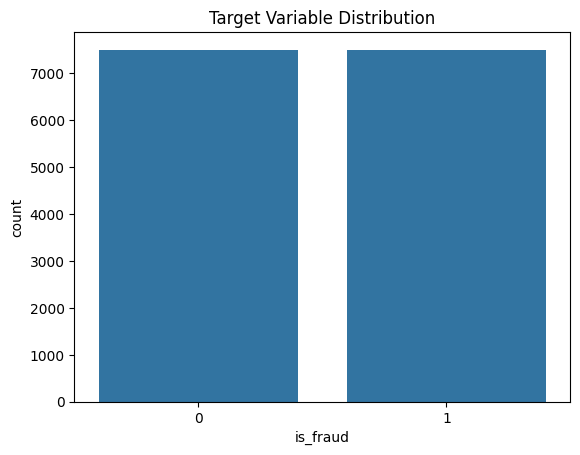

In [15]:
# Analyze the distribution of the target variable
target_distribution = data['is_fraud'].value_counts(normalize=True)
sns.countplot(x='is_fraud', data=data)
plt.title("Target Variable Distribution")
plt.show()

In [17]:
# Log target distribution to WandB
wandb.log({"target_distributions":target_distribution.to_dict()})

# TODO: Log the distribution plot to WandB
wandb.log({"target_distribution_plot":wandb.Image(plt)})


<Figure size 640x480 with 0 Axes>

### Key Observations:
- The target variable is highly imbalanced, with a significantly higher number of non-fraudulent transactions compared to fraudulent ones.
- This imbalance will need to be addressed during the model training phase to ensure the model does not become biased towards the majority class.


## 4. Numerical Features Analysis

Next, we will analyze the distribution and relationships of numerical features. This includes checking for outliers, understanding the distribution, and identifying correlations between features.


['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']


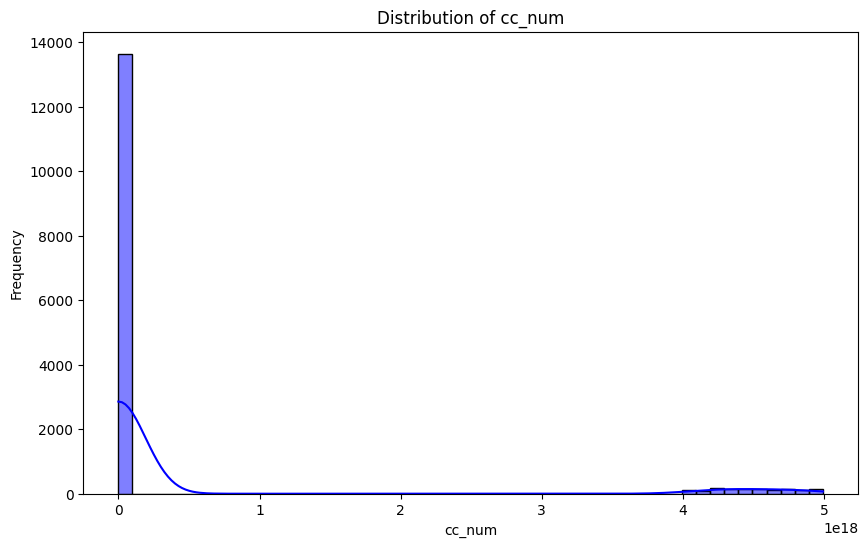

<Figure size 640x480 with 0 Axes>

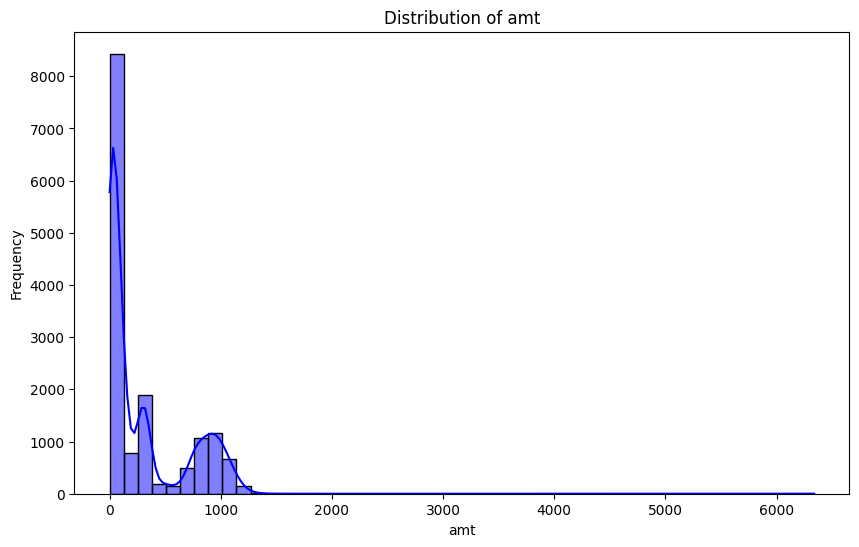

<Figure size 640x480 with 0 Axes>

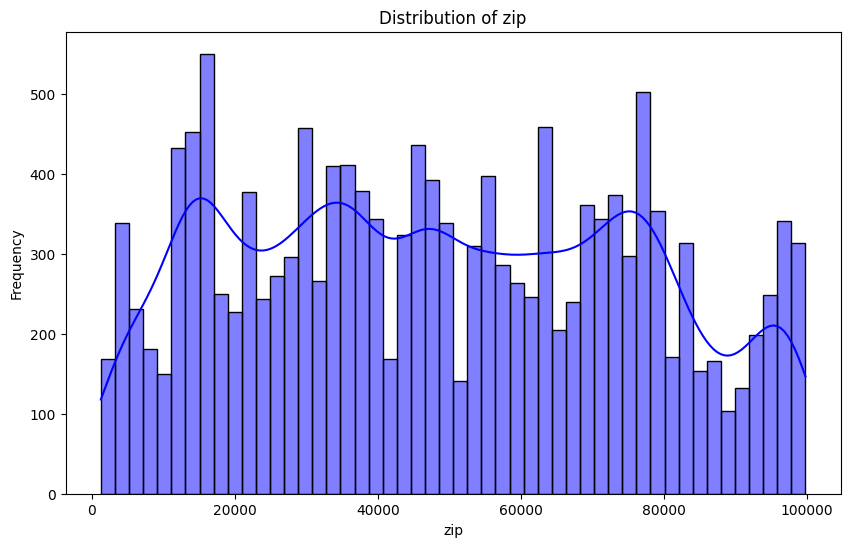

<Figure size 640x480 with 0 Axes>

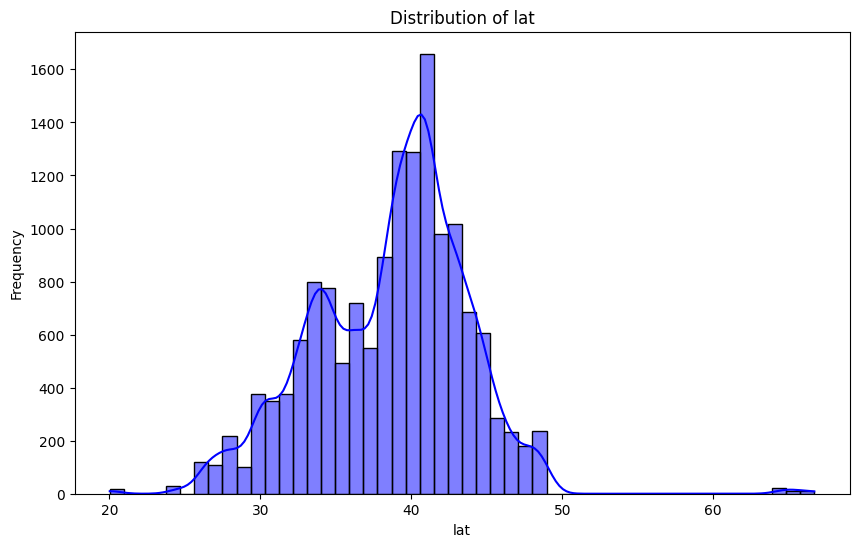

<Figure size 640x480 with 0 Axes>

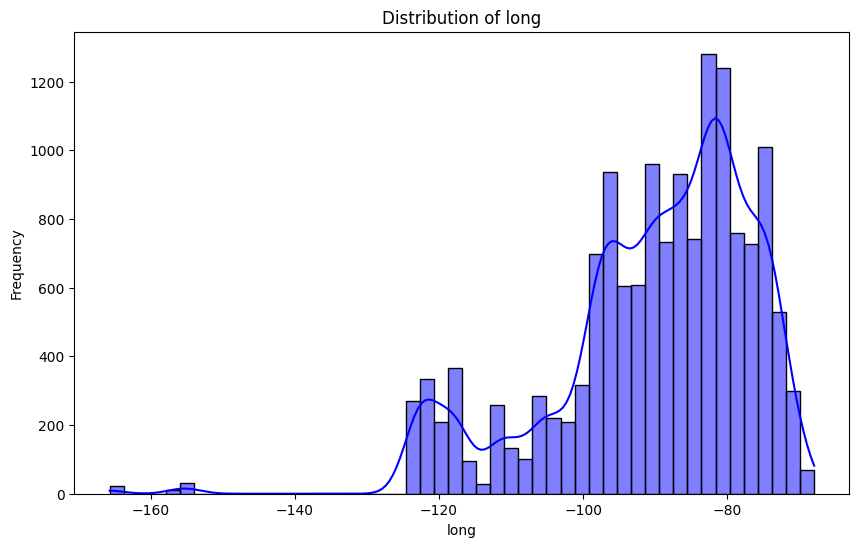

<Figure size 640x480 with 0 Axes>

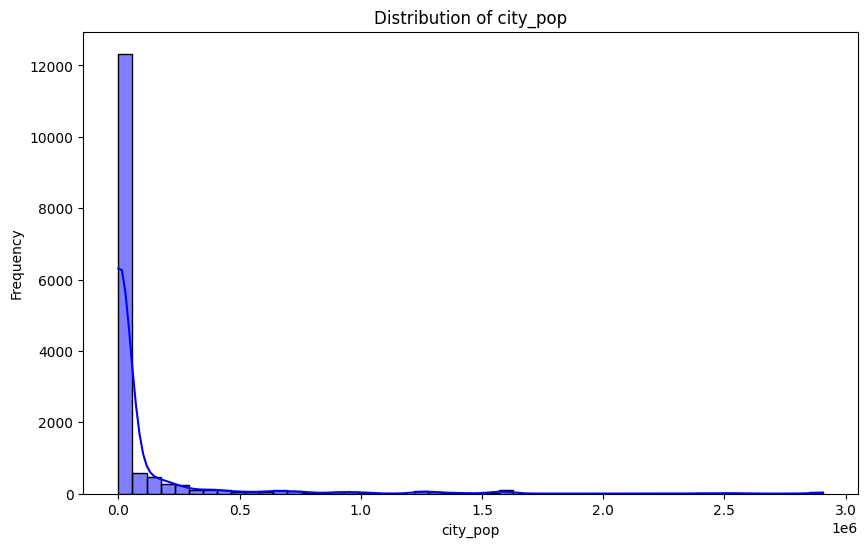

<Figure size 640x480 with 0 Axes>

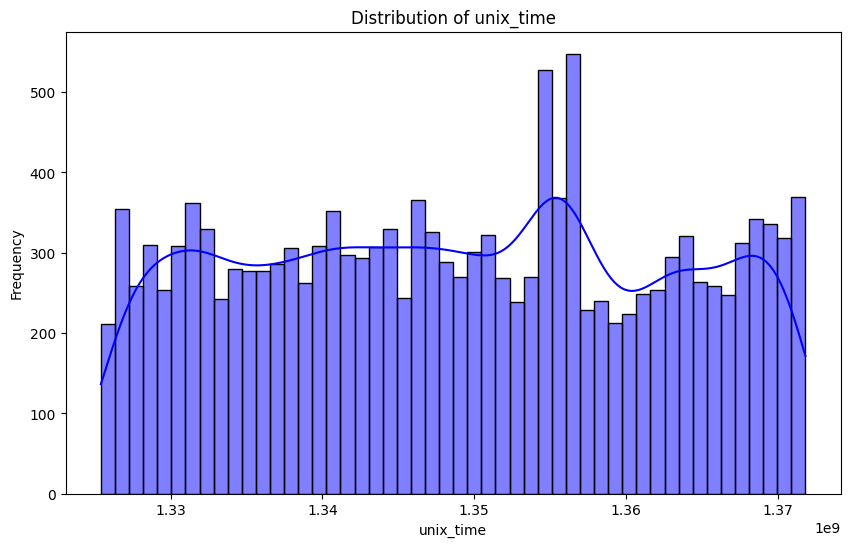

<Figure size 640x480 with 0 Axes>

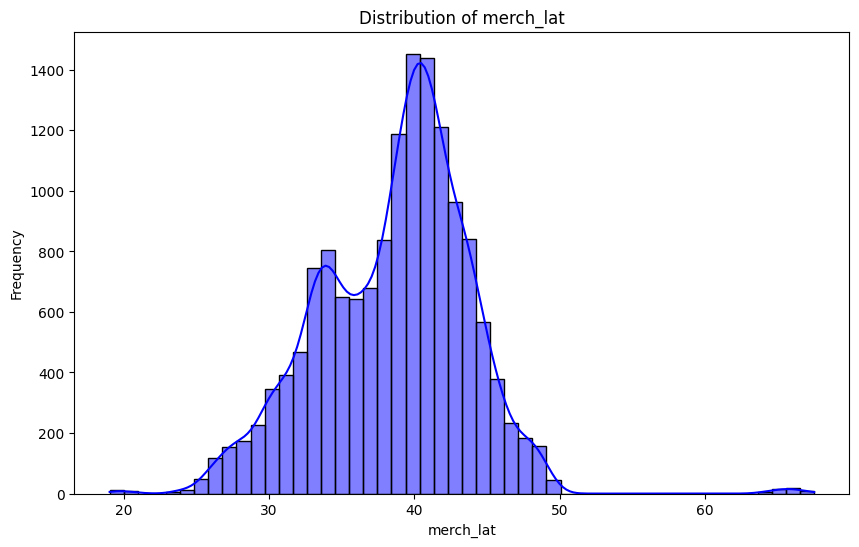

<Figure size 640x480 with 0 Axes>

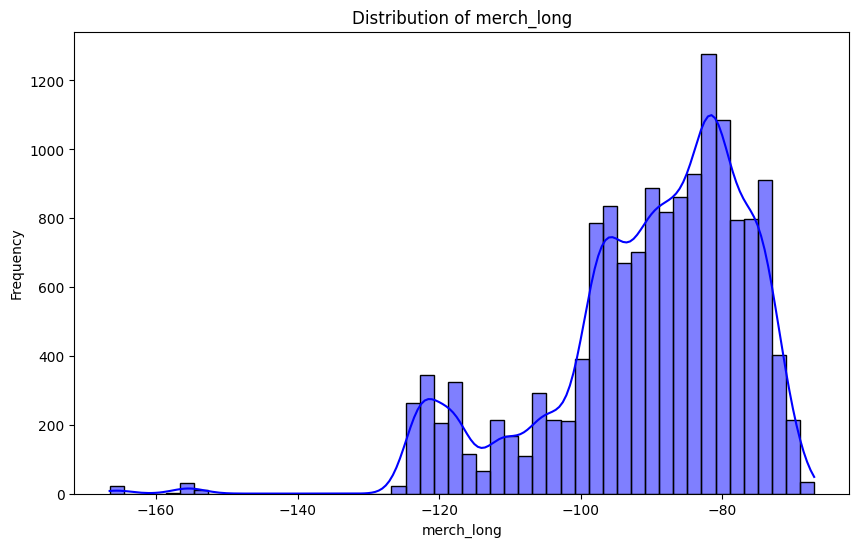

<Figure size 640x480 with 0 Axes>

In [18]:
# List of numerical features
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('is_fraud')  # Exclude target variable

print(num_features)
# Plotting distributions
for feature in num_features:
    plt.figure(figsize=(10,6))
    sns.histplot(data[feature], bins=50, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()
    
    # Save the figure   
    img_filename = f"{feature}_distribution.png"
    plt.savefig(img_filename)
    
    # TODO: Log each distribution plot to WandB
    wandb.log({f"{feature}_distribution_plot":wandb.Image(plt)})    

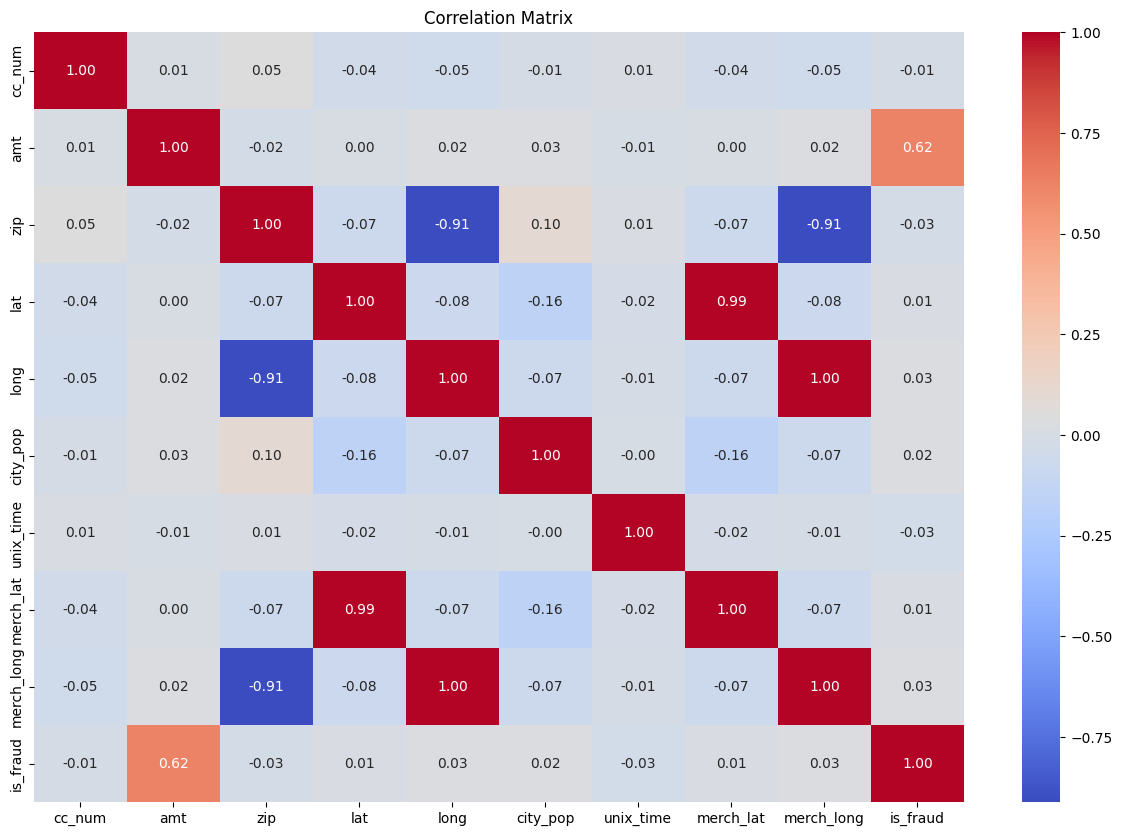

<Figure size 640x480 with 0 Axes>

In [19]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Log correlation matrix to WandB
wandb.log({"correlation_matrix": wandb.Image(plt)})

## 5. Outlier Detection
Identifying and handling outliers is crucial in data preprocessing. Outliers can significantly skew the results of machine learning models. We will use boxplots to visualize outliers in numerical features.


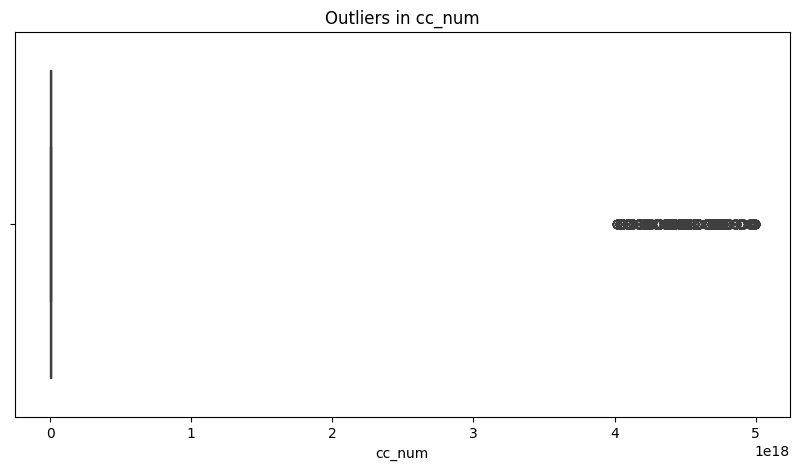

<Figure size 640x480 with 0 Axes>

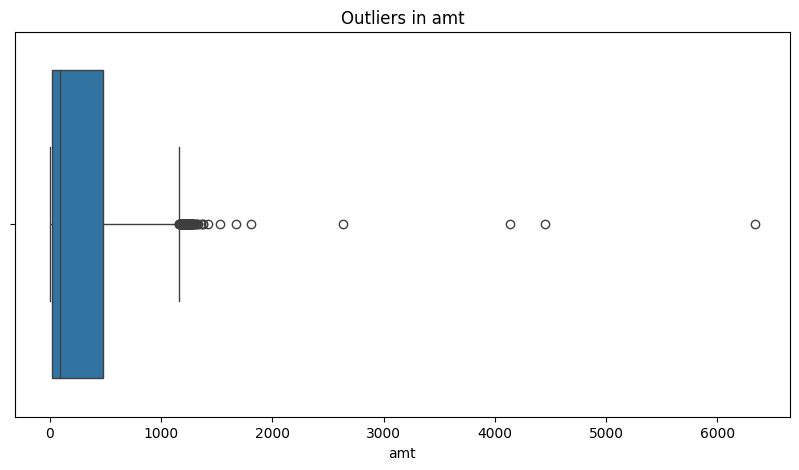

<Figure size 640x480 with 0 Axes>

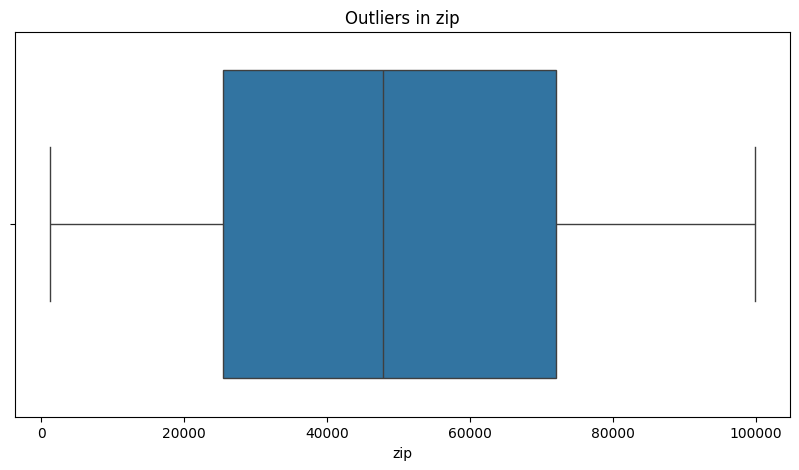

<Figure size 640x480 with 0 Axes>

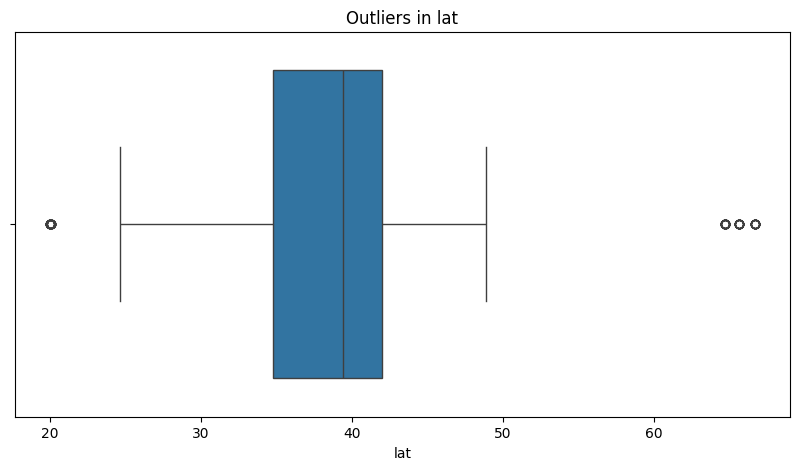

<Figure size 640x480 with 0 Axes>

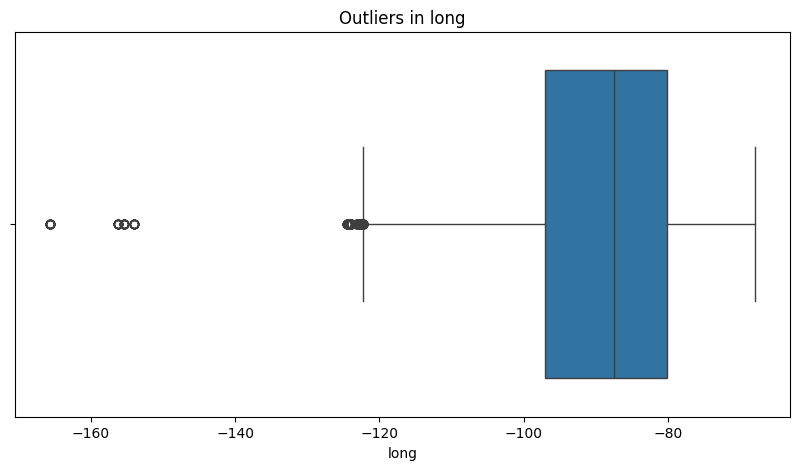

<Figure size 640x480 with 0 Axes>

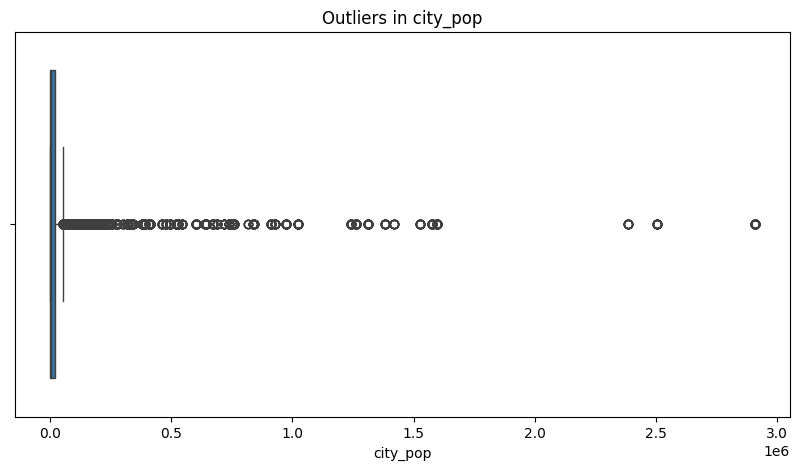

<Figure size 640x480 with 0 Axes>

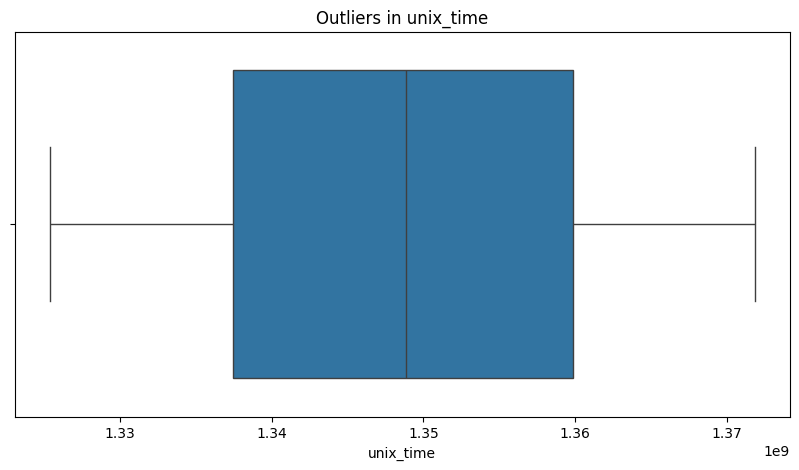

<Figure size 640x480 with 0 Axes>

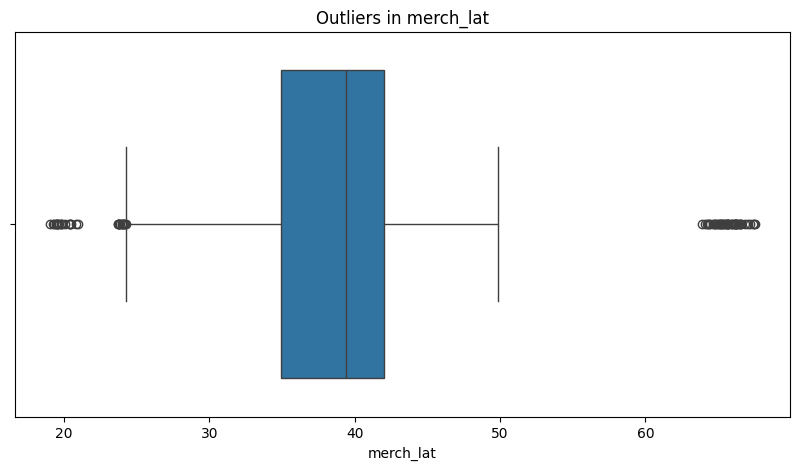

<Figure size 640x480 with 0 Axes>

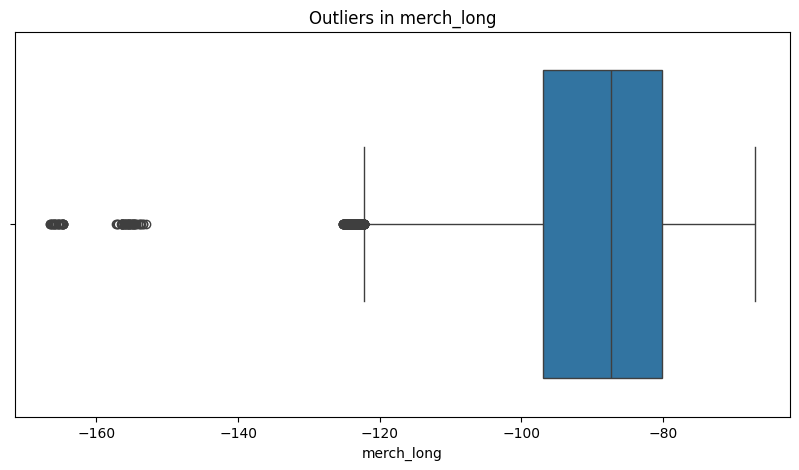

<Figure size 640x480 with 0 Axes>

In [20]:
# Identify outliers using boxplots
for feature in num_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f"Outliers in {feature}")
    plt.xlabel(feature)
    plt.show()
    # Log outlier detection to WandB
    wandb.log({f"{feature}_outliers": wandb.Image(plt)})

## 6. Sector analysis

This sample is taken from a great analysis found here by user rakeshhalijol: https://www.kaggle.com/code/rakeshhalijol/eda-modelling-using-xgboost-recall-98

In [21]:

sector_bag = {
    "IT": ["engineer", "developer", "programmer", "software", "IT", "technician", "architect", "system", "network", 
           "administrator", "data scientist", "cybersecurity", "web developer", "analyst", "database", "devops"],
    
    "Education": ["teacher", "professor", "educator", "trainer", "lecturer", "scientist", "Orthoptist", "tutor", 
                  "principal", "instructor", "counselor", "academic", "researcher", "dean", "school", "headmaster"],
    
    "Healthcare": ["doctor", "nurse", "medical", "therapist", "pharmacist", "health", "surgeon", "dentist", "clinician", 
                   "physician", "optometrist", "radiologist", "paramedic", "midwife", "veterinarian", "psychiatrist"],
    
    "Finance": ["analyst", "accountant", "auditor", "banker", "financial", "investment", "controller", "broker", 
                "consultant", "treasurer", "loan officer", "trader", "actuary", "economist", "portfolio", "credit"],
    
    "Marketing": ["manager", "executive", "specialist", "consultant", "advertising", "public relations", "strategist", 
                  "director", "coordinator", "brand", "SEO", "content", "digital", "market research", "social media", 
                  "copywriter"],
    
    "Manufacturing": ["operator", "mechanic", "assembler", "fabricator", "engineer", "technician", "welder", 
                      "planner", "quality", "machinist", "production", "inspector", "supervisor", "foreman", 
                      "toolmaker", "CNC"],
    
    "Retail": ["cashier", "salesperson", "store", "associate", "manager", "clerk", "shopkeeper", "merchandiser", 
               "assistant", "retail", "customer service", "sales", "inventory", "buyer", "stocker", "checkout"],
    
    "Legal": ["lawyer", "attorney", "paralegal", "judge", "legal", "solicitor", "notary", "clerk", "litigator", 
              "advocate", "barrister", "counsel", "magistrate", "prosecutor", "defense", "compliance"],
    
    "Hospitality": ["chef", "waiter", "bartender", "host", "manager", "receptionist", "housekeeper", "concierge", 
                    "caterer", "cook", "hotel", "tour guide", "event planner", "sous chef", "sommelier", "valet"],
    
    "Construction": ["builder", "carpenter", "electrician", "plumber", "architect", "project manager", "site manager", 
                     "surveyor", "foreman", "bricklayer", "roofer", "civil engineer", "construction", "contractor", 
                     "inspector", "draftsman"]
}

def assign_sector(x):
    for key in sector_bag:
        for role in sector_bag[key]:
            if x.find(role) != -1:
                return key
    return "Other"

Text(0.5, 1.0, 'different job sectors')

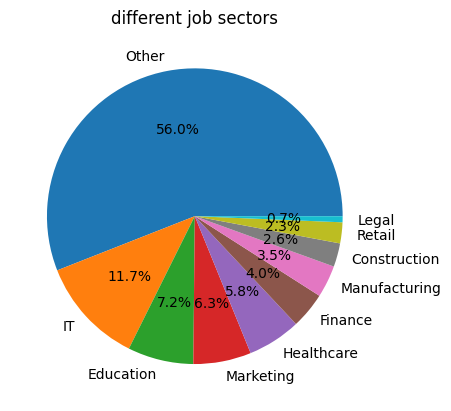

In [22]:
data["job_sector"] = data["job"].apply(assign_sector)
job = data["job_sector"].value_counts().reset_index()
plt.pie(x = job.get("count"), labels = job.get("job_sector"), autopct='%1.1f%%')
plt.title("different job sectors")